# **DSCI 100 Final Project** - Evangeline Chu 

### **Introduction**

Minecraft is one of the most popular sandbox games in the world, known for its open-ended gameplay and diverse player base. It’s an online game that generates a significant amount of user data, offering valuable insights into user behaviour and server engagement. In this project, I use data collected by a research group at UBC from Minecraft players to explore patterns in activity and participation.

The goal of this project is to know this: which types of players are most likely to contribute a large amount of gameplay data so that we can target those players in recruiting efforts?

To answer this we use two response variables:
- Number of sessions (the number of times a player logs on)
- Total hours played (how long a player played)

And three explanatory variables:
- Experience level (self-reported)
- Age
- Gender

I used two datasets:
- “players.csv”, which contains information on age, gender, experience, played hours, and a unique hashed email for each user
- “sessions.csv”, which logs each game session by hashed email

These two datasets were merged on hashedEmail and calculated the number of sessions per player, filtering out rows with missing session data. The resulting cleaned dataset was used to analyze which player characteristics are linked to high engagement.

### **Methods & Results**

To begin the analysis I loaded both datasets using read_csv() and then used glimpse() to inspect the structure and variables in each dataset. To understand how many sessions each player contributed, I grouped the sessions data by hashedEmail and calculated the number of sessions per playing using the summarize(n()) function. These sessions were then matched back into the players dataset with the match() function and filtered out any players with missing session data to create a cleaned dataset. From there, I used grouo_by() and summarize() to calculate the average number of sessions and total played hours grouped by experience, age and gender. I then used ggplot() to generate six visualizations that explored how these characteristics relate to player contributions: scatter and bar plots for age vs. sessions, bar plots for gender vs. sessions, and bar plots for experience, age, and gender vs. total played hours. Each plot included clear titles, axis labels and formatting for readability. This sequence of steps allowed for a comprehensive exploratory data analysis of which player traits are associated with higher contributions to the dataset.

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players<-read_csv("data/players.csv")
players

sessions<-read_csv("data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


*Table 1: Players data & Table 2: Sessions data*

In [3]:
glimpse(players)
glimpse(sessions)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

I would say that a "high contributor" would be a player thtat has had more than 5 sessions.

In [4]:
session_summary<-sessions|>
    group_by(hashedEmail)|>
    summarize(num_sessions=n())
session_summary

hashedEmail,num_sessions
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1


*Table 3: sessions grouped by hashedEmail data*

In [5]:
players$num_sessions<-session_summary$num_sessions[
    match(players$hashedEmail, session_summary$hashedEmail)]

players_with_sessions<-players|>
    filter(!is.na(num_sessions))
players_with_sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23,3
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,1


*Table 4: matched and cleaned dataset*

In [6]:
experience_players_with_sessions<-players_with_sessions|>
    group_by(experience)|>
    summarize(avg_sessions=mean(num_sessions))
experience_players_with_sessions

experience,avg_sessions
<chr>,<dbl>
Amateur,19.523810
Beginner,4.818182
Pro,3.545455
Regular,22.565217
Veteran,1.888889


*Table 5: average sessions and experience data*

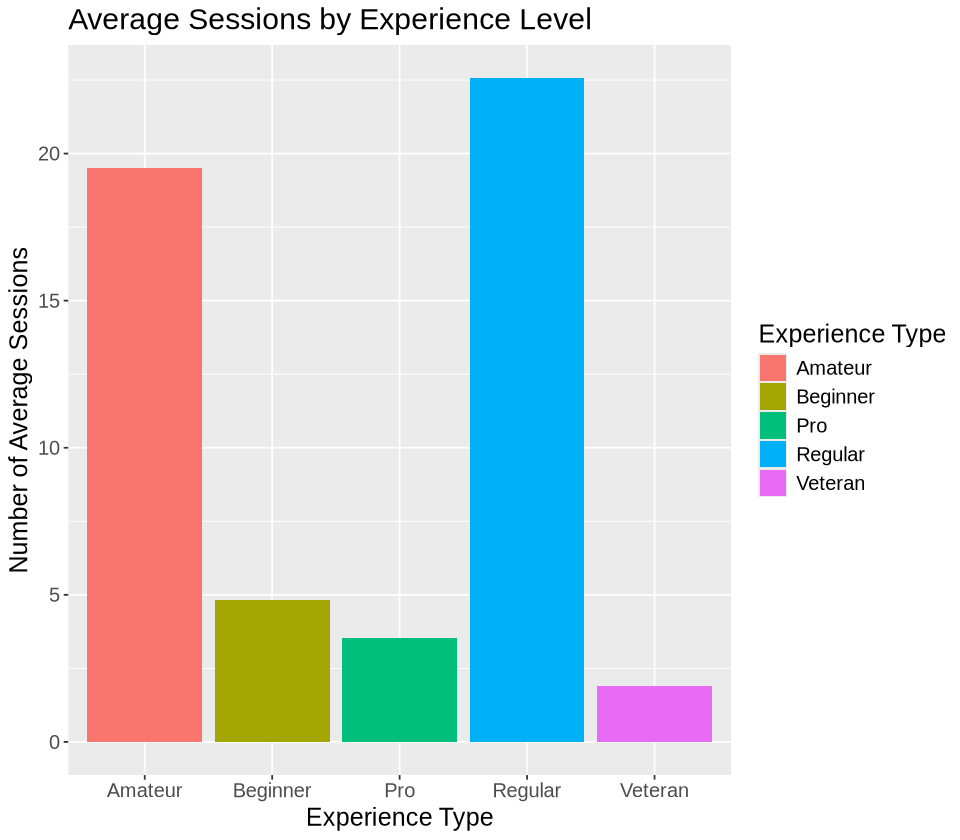

In [7]:
options(repr.plot.width = 8, repr.plot.height = 7)

experience_players_with_sessions_plot<-experience_players_with_sessions|>
    ggplot(aes(x=experience, y=avg_sessions, fill=experience))+
    geom_bar(stat="identity")+
    labs(title="Average Sessions by Experience Level", x="Experience Type", y="Number of Average Sessions", fill="Experience Type")+
    theme(text = element_text(size = 15))
experience_players_with_sessions_plot

*Figure 1: Average Sessions vs. Experience level bar plot*

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


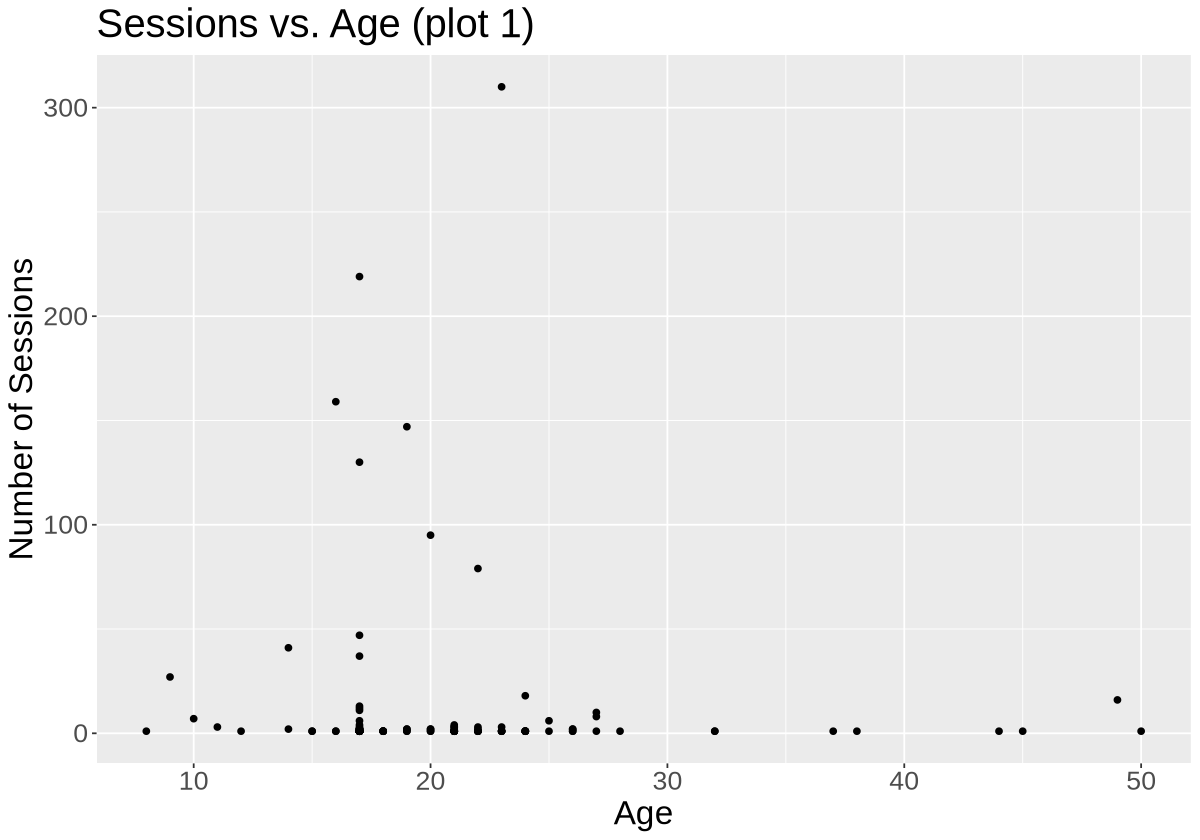

In [8]:
options(repr.plot.width = 10, repr.plot.height = 7)

age_players_with_sessions_plot1<-players_with_sessions|>
    ggplot(aes(x=Age, y=num_sessions))+
    geom_point()+
    labs(title="Sessions vs. Age (plot 1)", x="Age", y="Number of Sessions")+
    theme(text = element_text(size = 20))
age_players_with_sessions_plot1

*Figure 2: Number of Sessions vs. Age scatter plot (not averaged)*

In [9]:
age_players_with_sessions<-players_with_sessions|>
    group_by(Age)|>
    summarize(avg_sessions=mean(num_sessions))
age_players_with_sessions

Age,avg_sessions
<dbl>,<dbl>
8,1.000000
9,27.000000
10,7.000000
11,3.000000
12,1.000000
14,21.500000
15,1.000000
16,53.666667
17,12.116279


*Table 6: Average Sessions vs. Age data*

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


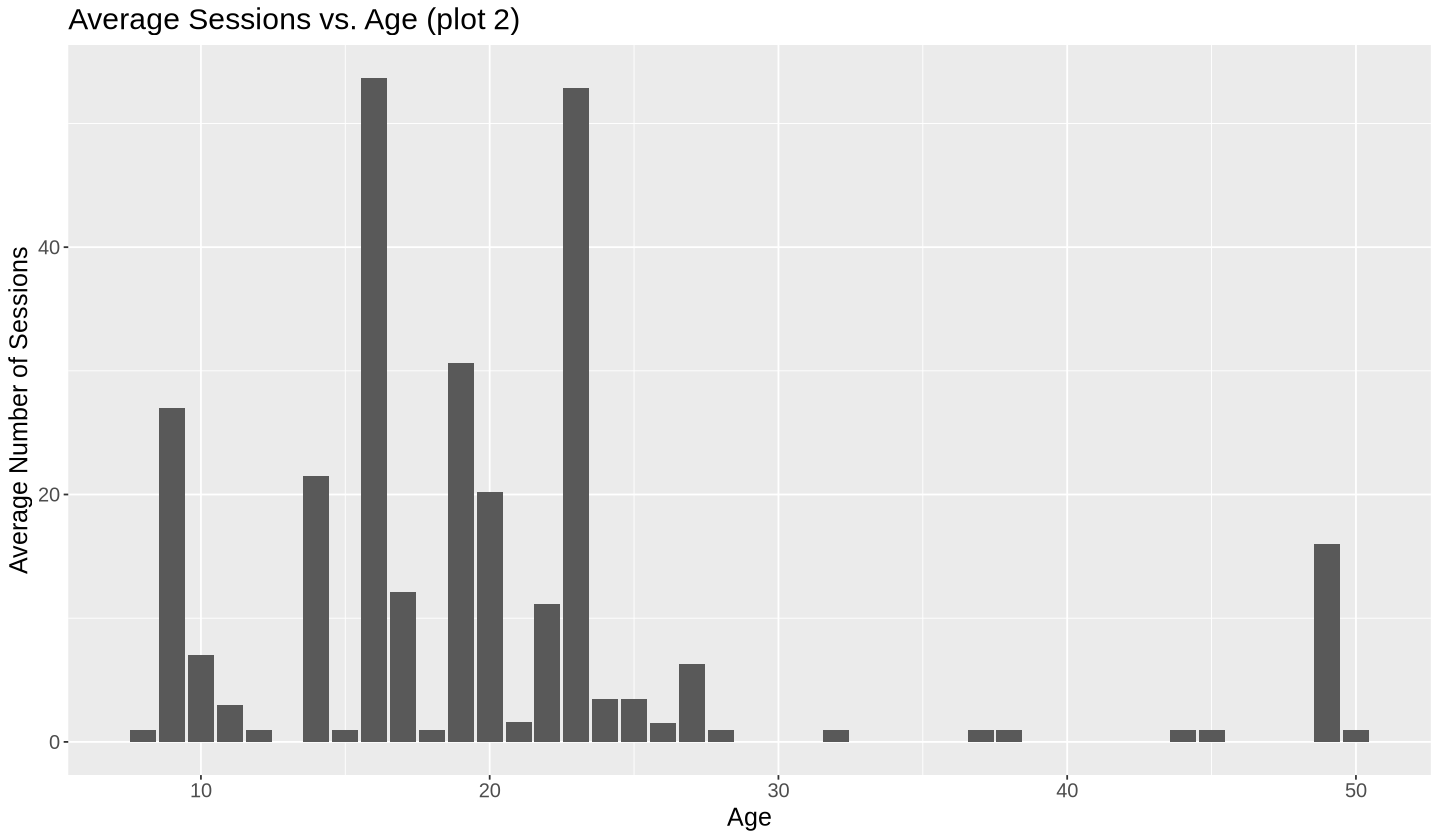

In [10]:
options(repr.plot.width = 12, repr.plot.height = 7)

age_players_with_sessions_plot2<-age_players_with_sessions|>
    ggplot(aes(x=Age, y=avg_sessions))+
    geom_bar(stat="identity")+
    labs(title="Average Sessions vs. Age (plot 2)", x="Age", y="Average Number of Sessions")+
    theme(text = element_text(size = 15))
age_players_with_sessions_plot2

*Figure 3: Average Sessions vs. Age bar plot*

In [11]:
gender_players_with_sessions<-players_with_sessions|>
    group_by(gender)|>
    summarize(avg_sessions=mean(num_sessions))
gender_players_with_sessions

gender,avg_sessions
<chr>,<dbl>
Agender,10.000000
Female,15.916667
Male,12.228916
Non-binary,17.333333
Other,1.000000
Prefer not to say,3.166667
Two-Spirited,1.000000


*Table 7: Average Sessions vs. Gender data*

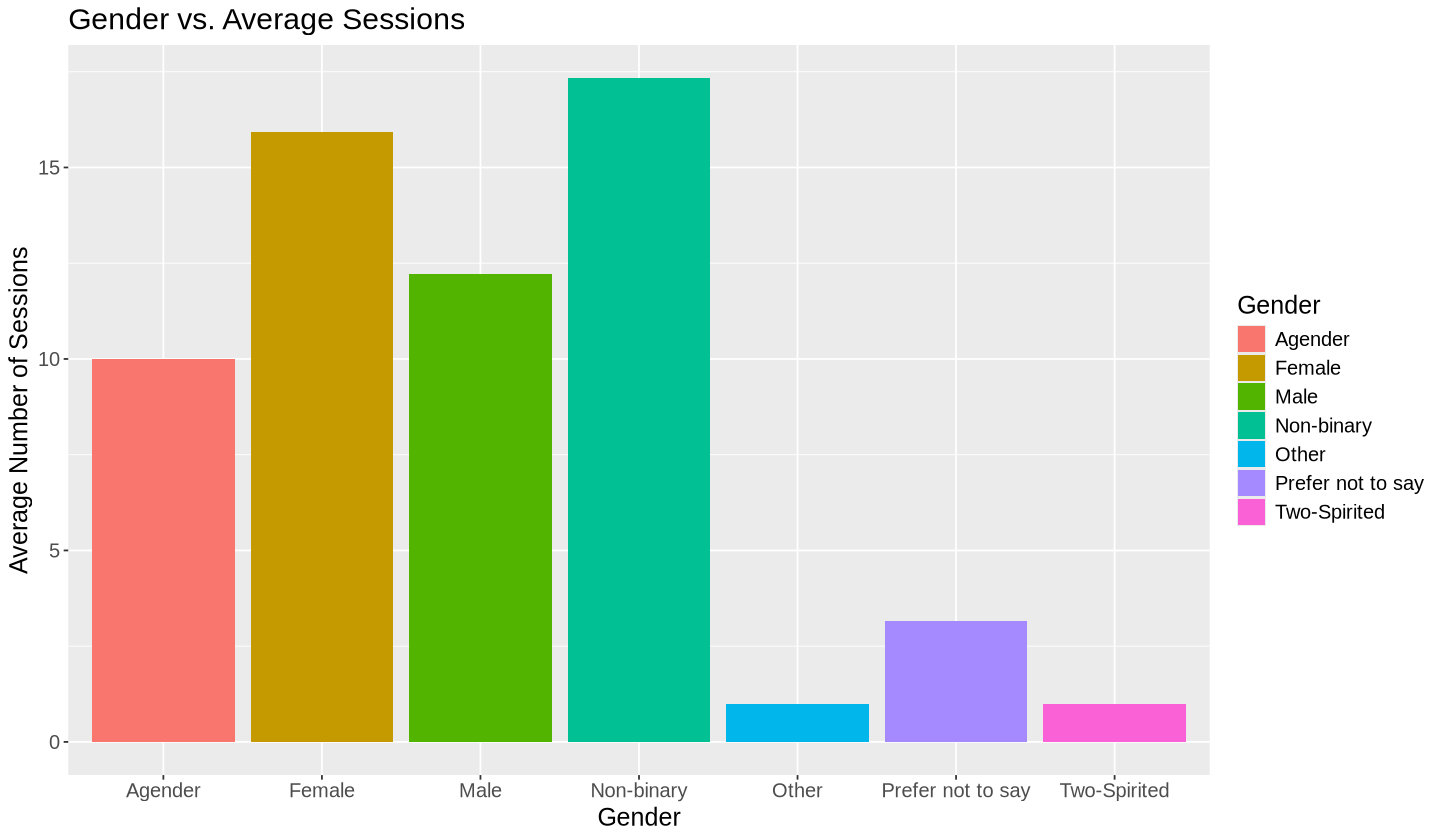

In [19]:
options(repr.plot.width = 12, repr.plot.height = 7)

gender_players_with_sessions_plot<-gender_players_with_sessions|>
    ggplot(aes(x=gender, y=avg_sessions, fill=gender))+
    geom_bar(stat="identity")+
    labs(title="Gender vs. Average Sessions", x="Gender", y="Average Number of Sessions", fill="Gender")+
    theme(text = element_text(size = 15))
gender_players_with_sessions_plot

*Figure 4: Average Sessions vs. Gender bar plot*

In [13]:
played_hours_experience<-players_with_sessions|>
    group_by(experience)|>
    summarize(total_played_hours=sum(played_hours))
played_hours_experience

experience,total_played_hours
<chr>,<dbl>
Amateur,379.1
Beginner,43.7
Pro,36.4
Regular,655.5
Veteran,31.1


*Table 8: experience vs total played hours data*

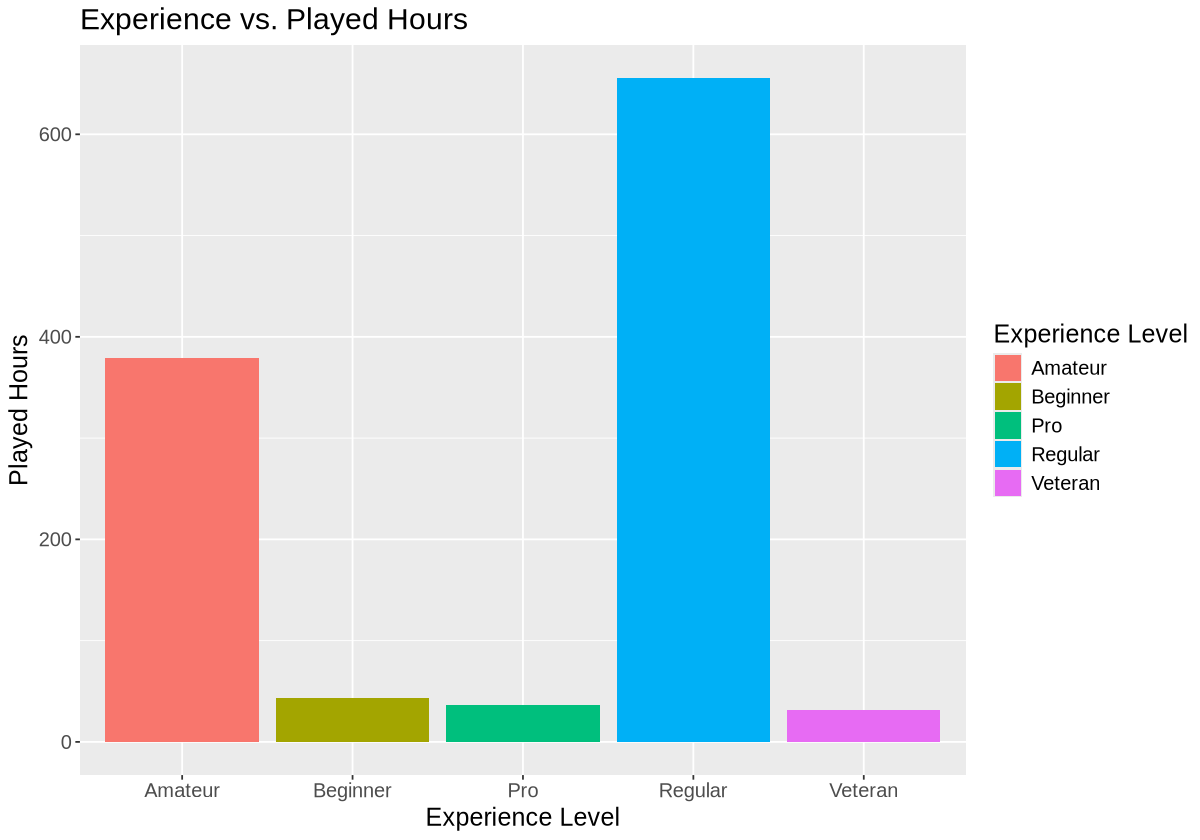

In [14]:
options(repr.plot.width = 10, repr.plot.height = 7)

played_hours_experience_plot<-played_hours_experience|>
    ggplot(aes(x=experience, y=total_played_hours, fill=experience))+
    geom_bar(stat="identity")+
    labs(title="Experience vs. Played Hours", x="Experience Level", y="Played Hours", fill="Experience Level")+
    theme(text = element_text(size = 15))
played_hours_experience_plot

*Figure 5: Experience vs. Played Hours bar plot*

In [15]:
played_hours_age<-players_with_sessions|>
    group_by(Age)|>
    summarize(total_played_hours=sum(played_hours))
played_hours_age

Age,total_played_hours
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
11,2.9
12,0.5
14,17.4
15,0.2
16,150.1
17,356.8


*Table 9: age vs total played hours data*

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


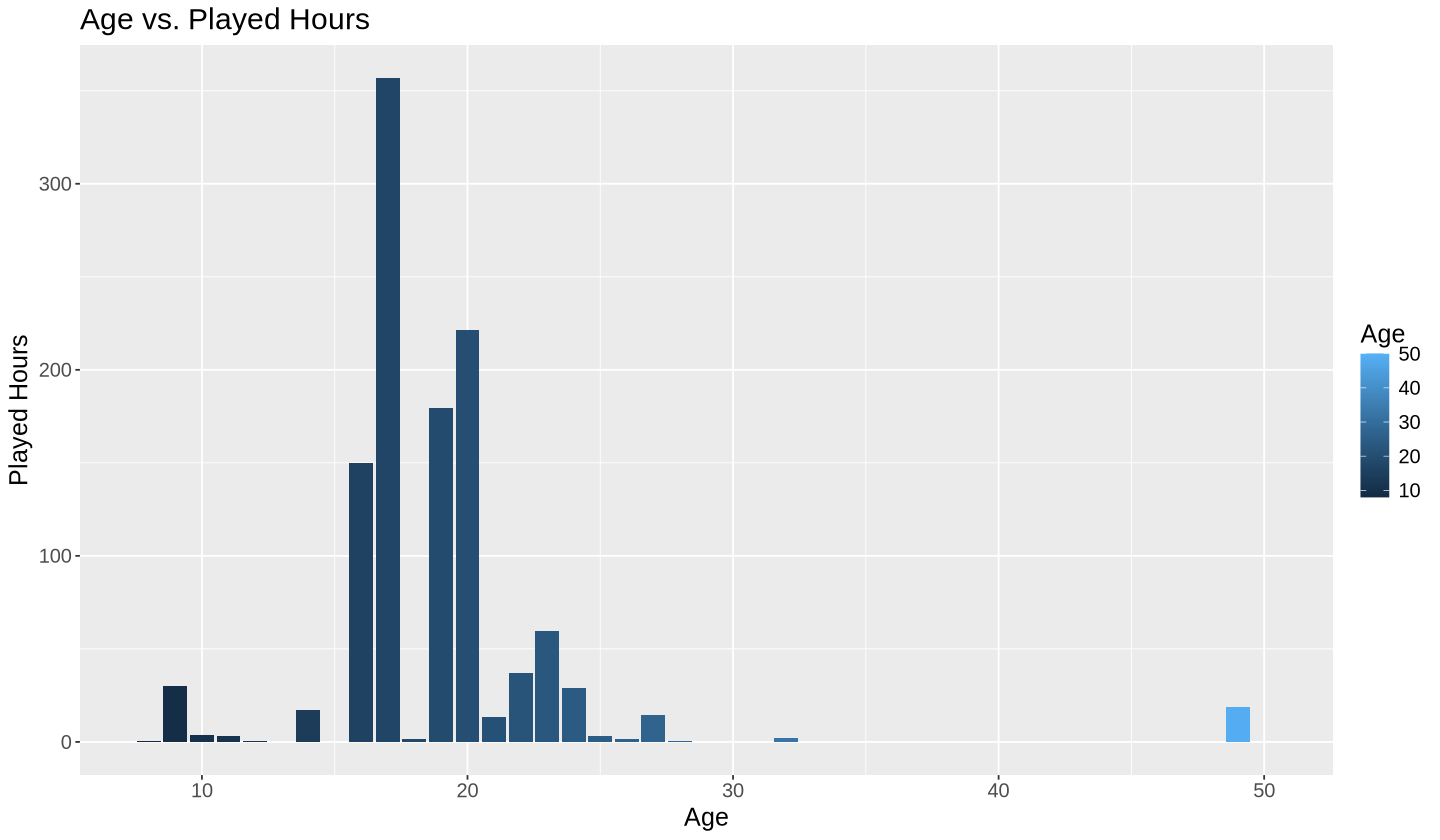

In [16]:
options(repr.plot.width = 12, repr.plot.height = 7)

played_hours_age_plot<-played_hours_age|>
    ggplot(aes(x=Age, y=total_played_hours, fill=Age))+
    geom_bar(stat="identity")+
    labs(title="Age vs. Played Hours", x="Age", y="Played Hours", fill="Age")+
    theme(text = element_text(size = 15))
played_hours_age_plot

*Figure 6: Age vs. Played Hours bar plot*

In [17]:
played_hours_gender<-players_with_sessions|>
    group_by(gender)|>
    summarize(total_played_hours=sum(played_hours))
played_hours_gender

gender,total_played_hours
<chr>,<dbl>
Agender,12.5
Female,393.5
Male,511.8
Non-binary,223.2
Other,0.2
Prefer not to say,4.1
Two-Spirited,0.5


*Table 10: gender vs total played hours data*

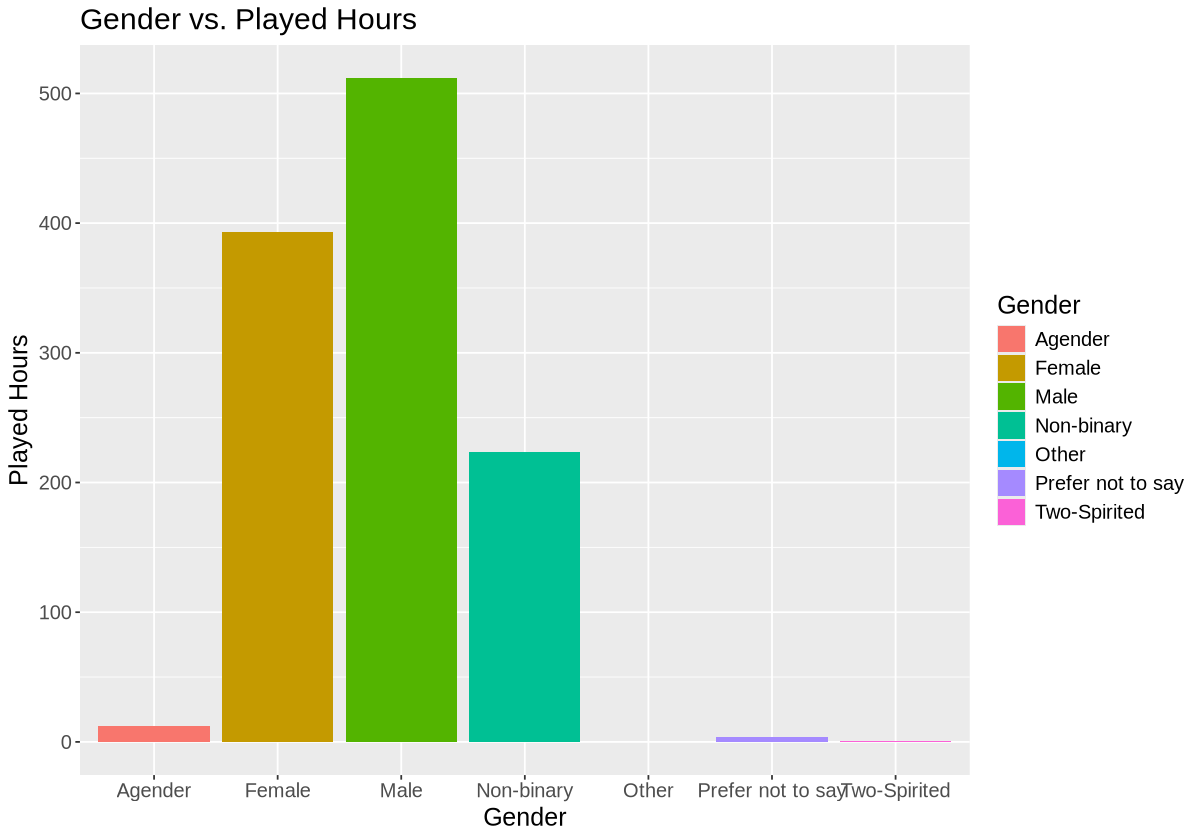

In [18]:
options(repr.plot.width = 10, repr.plot.height = 7)

played_hours_gender_plot<-played_hours_gender|>
    ggplot(aes(x=gender, y=total_played_hours, fill=gender))+
    geom_bar(stat="identity")+
    labs(title="Gender vs. Played Hours", x="Gender", y="Played Hours", fill="Gender")+
    theme(text = element_text(size = 15))
played_hours_gender_plot

*Figure 7: Gender vs. Played Hours bar plot*

The visualizations provided several insights into which kinds of players contribute the most data, as measured by number of sessions and total played hours. Players with higher experience levels tended to contribute significantly more sessions and played hours than beginners, suggesting that experienced players are more engaged and more likely to generate rich datasets. The age-based plots showed that players around their late teens to mid-twenties had the highest average number of sessions and total played hours, indicating that younger users might be more active on the platform. Gender-based visualizations revealed a smaller but noticeable difference since one gender showed slightly higher average sessions and total hours played. These patterns helped identify experience and age as strong candidate predictors of data contribution, and motivated further analysis focusing on those variables. Overall, the plots informed which characteristics are worth targeting in recruitment strategies to maximize data yield.

This method was appropriate because the goal was to understand relationships between player characteristics and the amount of data they contribute, which suits a descriptive and exploratory data analysis approach. No strict statistical assumptions were required, since we focused on summarizing and visualizing observed trends rather than applying inferential models. One limitation is that we did not fit a predictive model, so we cannot formally assess the predictive power of each variable. By grouping and aggregating data however, we could still compare variables effectively. We processed the data by merging session counts into the player dataset, removing missing values, and creating group summaries. No train-test splits or validation were needed, as the analysis was not predictive. Instead, visual patterns and averages were used to identify which groups, by age, gender, or experience, tended to contribute more sessions and playtime, helping to answer our question.

### **Discussion**

As a result from the analysis, I found that more experienced players tend to contribute significantly more sessions and total hours played, suggesting that experience is a strong indicator of engagement. Additionally, older players and male players also showed slightly higher average activity levels, although the difference by gender was less pronounced. These trends aligned with my expectations, especially regarding experience level, as experienced players are more likely to be committed and frequent users. These findings could help guide recruitment strategies by focusing on players who are older or more experienced, potentially improving the richness of collected data. In the future, it would be interesting to investigate whether specific in-game behaviors or other unobserved variables can further explain engagement, or to build predictive models that identify high-contributing players before they become highly active.